# 훈련 세트와 테스트 세트

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/2-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 훈련 세트와 테스트 세트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
FixedWing_df = pd.read_csv("FixedWing.csv")
MultiCopter_df = pd.read_csv("MultiCopter.csv")

In [3]:
FixedWing_df.columns

Index(['Company', 'Name', 'Length', 'Width', 'Weight'], dtype='object')

In [4]:
FixedWingLength = FixedWing_df.loc[:,"Length"].to_list()
FixedWingWeight = FixedWing_df.loc[:, "Weight"].to_list()
MultiCopterLength = MultiCopter_df.loc[:, "Length"].to_list()
MultiCopterWeight = MultiCopter_df.loc[:, "Weight"].to_list()

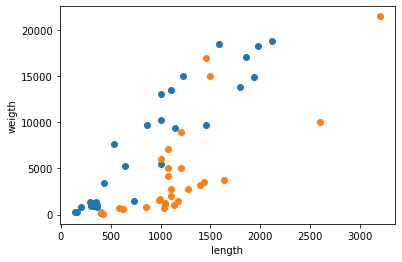

In [5]:
plt.scatter(MultiCopterLength, MultiCopterWeight)
plt.scatter(FixedWingLength, FixedWingWeight)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [6]:
length = MultiCopterLength + FixedWingLength
weight = MultiCopterWeight + FixedWingWeight 

In [7]:
drone_data = [[ l, w,] for l, w in zip(length, weight)]
drone_target = [1] * 30 + [0] * 28

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [9]:
print(drone_data[4])

[427.0, 3440]


In [10]:
print(drone_data[0:5])

[[322.0, 905], [322.0, 907], [289.5, 1375], [143.0, 300], [427.0, 3440]]


In [11]:
print(drone_data[:5])

[[322.0, 905], [322.0, 907], [289.5, 1375], [143.0, 300], [427.0, 3440]]


In [12]:
print(drone_data[44:])

[[1460, 17000], [1070, 5000], [1637, 3780], [1100, 2750], [855, 830], [1045, 1100], [990, 1700], [1030, 760], [1045, 1250], [980, 1540], [1075, 7100], [405, 300], [620, 650], [1170, 1500]]


In [13]:
train_input = drone_data[:30]
train_target = drone_target[:30]

test_input = drone_data[30:]
test_target = drone_target[30:] 

In [14]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

## 넘파이

In [10]:
import numpy as np

In [15]:
input_arr = np.array(drone_data)
target_arr = np.array(drone_target)

In [16]:
print(input_arr)

[[  322.    905. ]
 [  322.    907. ]
 [  289.5  1375. ]
 [  143.    300. ]
 [  427.   3440. ]
 [ 1460.   9700. ]
 [  400.    147. ]
 [ 1940.  14900. ]
 [ 1860.  17100. ]
 [  365.    992. ]
 [ 1974.  18320. ]
 [ 1590.  18500. ]
 [  730.   1434. ]
 [ 1002.   5500. ]
 [  204.    790. ]
 [  305.    945. ]
 [  159.    249. ]
 [ 1800.  13800. ]
 [  860.   9700. ]
 [ 1140.   9400. ]
 [ 1225.  15000. ]
 [  350.   1400. ]
 [ 1000.  13100. ]
 [ 1100.  13500. ]
 [  643.   5250. ]
 [  535.   7600. ]
 [  330.   1200. ]
 [ 1000.  10200. ]
 [  360.    850. ]
 [ 2123.  18800. ]
 [  420.     65. ]
 [ 1400.   3200. ]
 [ 1440.   3500. ]
 [ 1200.   5000. ]
 [ 1100.   2000. ]
 [ 1132.   1050. ]
 [ 1000.   6000. ]
 [ 1500.  15000. ]
 [  580.    750. ]
 [ 2600.  10000. ]
 [ 3200.  21500. ]
 [ 1200.   9000. ]
 [ 1070.   4200. ]
 [ 1270.   2750. ]
 [ 1460.  17000. ]
 [ 1070.   5000. ]
 [ 1637.   3780. ]
 [ 1100.   2750. ]
 [  855.    830. ]
 [ 1045.   1100. ]
 [  990.   1700. ]
 [ 1030.    760. ]
 [ 1045.   1

In [17]:
print(input_arr.shape)

(58, 2)


In [18]:
#np.random.seed(42)   #교육용 기능
index = np.arange(58)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]


In [19]:
np.random.shuffle(index)

In [20]:
print(index)

[29 24 38  1 47 20 21 25 23 55 44  9 15 14 39 22 52  8 13 17 36 40  2  5
 18 50  6 34 46 37  0  7 28 32 57 26 35 31 33 53 43 56 11  4 49 10 19 45
  3 16 30 48 42 27 12 54 51 41]


In [21]:
print(input_arr[[1,3]])

[[322. 907.]
 [143. 300.]]


In [22]:
train_input = input_arr[index[:30]]
train_target = target_arr[index[:30]]

In [23]:
print(input_arr[13], train_input[0])

[1002. 5500.] [ 2123. 18800.]


In [24]:
test_input = input_arr[index[30:]]
test_target = target_arr[index[30:]]

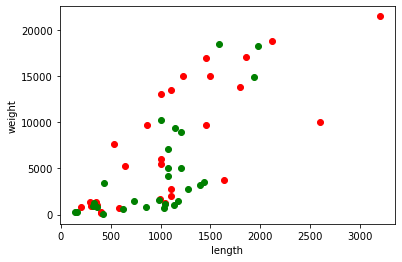

In [34]:
plt.scatter(train_input[:, 0], train_input[:, 1], color='red')
plt.scatter(test_input[:, 0], test_input[:, 1], color = 'green')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

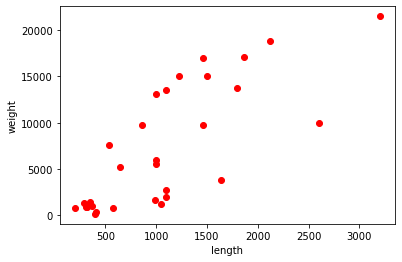

In [35]:
plt.scatter(train_input[:, 0], train_input[:, 1], color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

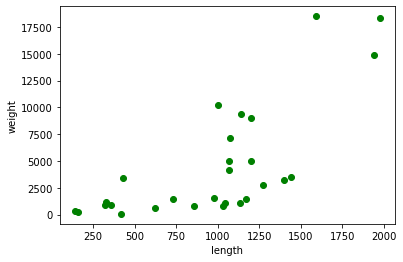

In [36]:
plt.scatter(test_input[:, 0], test_input[:, 1], color = 'green')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두 번째 머신러닝 프로그램

In [28]:
kn = kn.fit(train_input, train_target)

In [29]:
kn.score(test_input, test_target)

0.7142857142857143

In [30]:
kn.predict(test_input)

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1])

In [31]:
test_target

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0])

In [32]:
train_target

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0])